# Ví dụ 1

In [2]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

## Visualize 

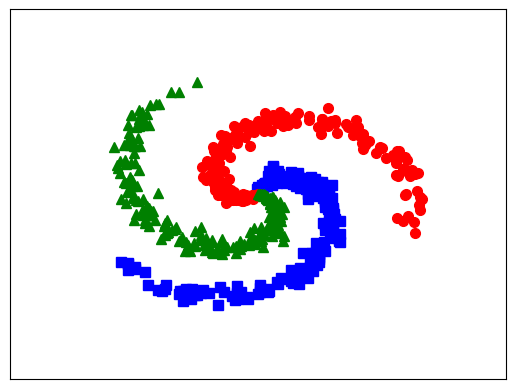

In [3]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

## Các hàm cơ sở

In [4]:
def softmax(V):
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z

# cost or loss function
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
  Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

## Khởi tạo các giá trị

In [5]:
d0 = 2
d1 = h = 100 # size of hidden layer

d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
print(X.shape)
eta = 1 # learning rate

(2, 600)


## Feedforward và Backpropagation

In [ ]:
for i in range(10000 + 1):
## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)

  # print loss after each 1000 iterations
  if i %1000 == 0:
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    print("iter %d, loss: %f" %(i, loss))

  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)
  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

(100, 600)
iter 0, loss: 0.015883
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600)
(100, 600

## Tính accuracy cho training

In [7]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


## Trực quan hóa đường phân cách

(1, 14400)
100


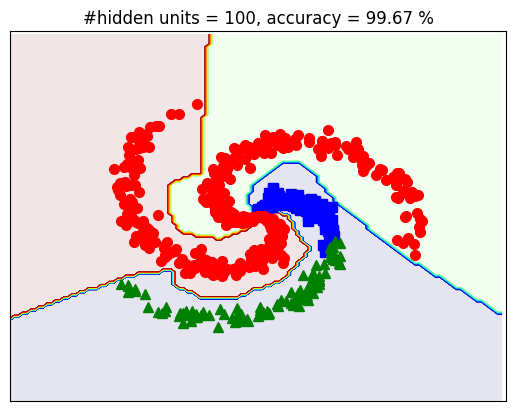

In [8]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 100
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()